##Mamadou DIOUF

Internship

Spatial point Poisson processes




Inhomogeneous Poisson process in a
separable and bounded metric space

Application: We define three gaussian intensities on the space S:=[0, 1] x [0, 1].

Higher intensity around (0.25, 0.25) :$\lambda_1(x,y) = 10e^{-\frac{(x-0.25)^2+(y-0.25)^2}{2\times0.05^2}}+0.5$

Higher intensity around (0.75, 0.75): $\lambda_2(x,y) = 8e^{-\frac{(x-0.75)^2+(y-0.75)^2}{2\times0.08^2}}+0.2$

Higher intensity around (0.25, 0.75) and (0.75, 0.25):

$\lambda_3(x,y) =7e^{-\frac{(x-0.25)^2+(y-0.25)^2}{2\times0.06^2}}+ 7e^{-\frac{(x-0.75)^2+(y-0.75)^2}{2\times0.06^2}}+1$

And we compare the results of classifications Bayes classifier using the intensities to the KNN classifier.


/tmp/ipython-input-3001436759.py:93: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
/tmp/ipython-input-3001436759.py:105: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
/tmp/ipython-input-3001436759.py:117: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


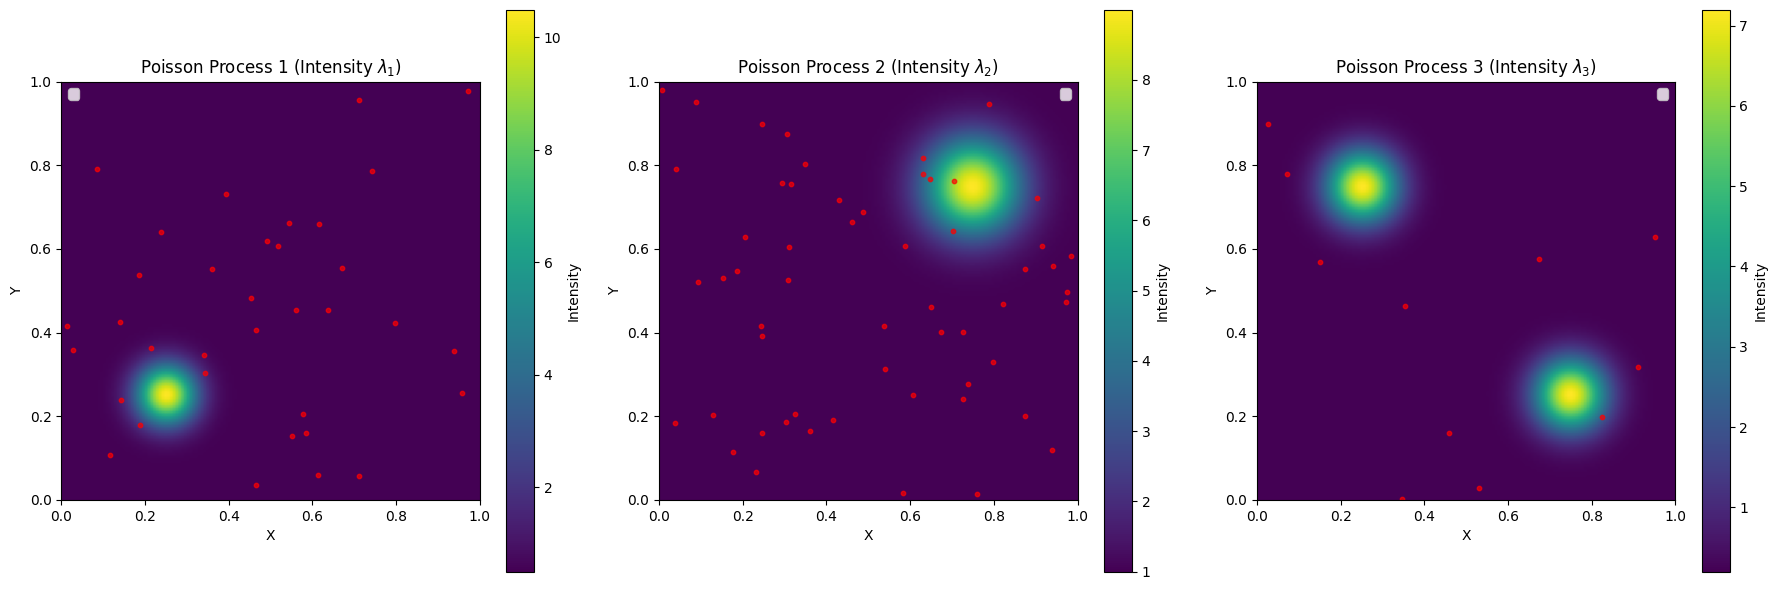

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy import integrate

# Define the space S: a 2D square [0, 1] x [0, 1]
S_area = 1.0 # Area of S (1 * 1)

# === EXAMPLE OF A GOOD GRID_SIZE ===
grid_size = 150 # A good general-purpose grid size for balance of accuracy and speed

# 1. Define three intensity functions lambda_j(xi) for j=1, 2, 3
def lambda_1(xi_x, xi_y):
    # Higher intensity around (0.25, 0.25)
    return 10 * np.exp(-((xi_x - 0.25)**2 + (xi_y - 0.25)**2) / (2 * 0.05**2)) + 0.5

def lambda_2(xi_x, xi_y):
    # Higher intensity around (0.75, 0.75)
    return 8 * np.exp(-((xi_x - 0.75)**2 + (xi_y - 0.75)**2) / (2 * 0.08**2)) + 1.0

def lambda_3(xi_x, xi_y):
    # Higher intensity around (0.25, 0.75) and (0.75, 0.25)
    return 7 * np.exp(-((xi_x - 0.25)**2 + (xi_y - 0.75)**2) / (2 * 0.06**2)) + \
           7 * np.exp(-((xi_x - 0.75)**2 + (xi_y - 0.25)**2) / (2 * 0.06**2)) + 0.2


# Function to simulate a single Poisson process realization using thinning
def simulate_poisson_process(intensity_func, S_area, grid_size, num_realizations=1):
    realizations = []

    # Calculate lambda_S for the given intensity function
    lambda_S = integrate.dblquad(intensity_func, 0, 1, 0, 1)[0]

    if lambda_S < 1e-9: # Prevent division by zero or tiny numbers
        print(" Prevent division by zero or tiny numbers : lambda_max = "+str(lambda_S))
        lambda_S = 1.0

    mean_homogeneous_points = lambda_S * S_area

    for _ in range(num_realizations):
        num_proposed_points = poisson.rvs(mean_homogeneous_points)

        proposed_x = np.random.rand(num_proposed_points)
        proposed_y = np.random.rand(num_proposed_points)

        actual_points_x = []
        actual_points_y = []

        for i in range(num_proposed_points):
            xi_x, xi_y = proposed_x[i], proposed_y[i]
            prob_keep = intensity_func(xi_x, xi_y) / lambda_S

            if np.random.rand() < prob_keep:
                actual_points_x.append(xi_x)
                actual_points_y.append(xi_y)

        realizations.append(np.array(list(zip(actual_points_x, actual_points_y))))

    return realizations

# Simulate one realization for each of the three Poisson processes
realizations_1 = simulate_poisson_process(lambda_1, S_area, grid_size, num_realizations=50)
realizations_2 = simulate_poisson_process(lambda_2, S_area, grid_size, num_realizations=50)
realizations_3 = simulate_poisson_process(lambda_3, S_area, grid_size, num_realizations=50)

# realization_1 = realizations_1[0]
# realization_2 = realizations_2[0]
# realization_3 = realizations_3[0]


# print(f"Realization from Process 1 has {len(realizations_1)} points.")
# print(f"Realization from Process 2 has {len(realizations_2)} points.")
# print(f"Realization from Process 3 has {len(realizations_3)} points.")

# Visualize the intensity functions and a sample realization for each
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create a meshgrid for plotting intensity functions
x_grid = np.linspace(0, 1, grid_size)
y_grid = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Plotting Process 1
Z1 = lambda_1(X, Y)
im1 = axes[0].imshow(Z1, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
for realization_1 in realizations_1:
  if len(realization_1) > 0:
      axes[0].scatter(realization_1[:, 0], realization_1[:, 1], color='red', s=10, alpha=0.7)
axes[0].set_title('Poisson Process 1 (Intensity $\lambda_1$)')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
fig.colorbar(im1, ax=axes[0], label='Intensity')
axes[0].legend()

# Plotting Process 2
Z2 = lambda_2(X, Y)
im2 = axes[1].imshow(Z2, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
for realization_2 in realizations_2:
  if len(realization_2) > 0:
      axes[1].scatter(realization_2[:, 0], realization_2[:, 1], color='red', s=10, alpha=0.7)
axes[1].set_title('Poisson Process 2 (Intensity $\lambda_2$)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
fig.colorbar(im2, ax=axes[1], label='Intensity')
axes[1].legend()

# Plotting Process 3
Z3 = lambda_3(X, Y)
im3 = axes[2].imshow(Z3, origin='lower', extent=[0, 1, 0, 1], cmap='viridis')
for realization_3 in realizations_3:
  if len(realization_3) > 0:
    axes[2].scatter(realization_3[:, 0], realization_3[:, 1], color='red', s=10, alpha=0.7)
axes[2].set_title('Poisson Process 3 (Intensity $\lambda_3$)')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
fig.colorbar(im3, ax=axes[2], label='Intensity')
axes[2].legend()

plt.tight_layout()
plt.show()



Proposition 5.3: (Lemma) Bayes classifier of a inhomogeneous Poisson process in a separable and bounded metric space

Let $(X, Y) \in S^\infty \times \{0, \dots, M\}$. Let $X|Y = j$ be Poisson processes on $S^\infty$ with intensities $\lambda_j$, $j=1, \dots, M$, respectively. Then the Bayes rule classifies a point $x \in S^\infty$ into class $j$ if
$$ \forall_{i \ne j} \quad \exp\{\mu_i(S) - \mu_j(S)\} \prod_{\xi \in x} \frac{\lambda_j(\xi)}{\lambda_i(\xi)} > \frac{p_i}{p_j} $$
where $p_i = \mathrm{Pr}(Y=i)$, $i=1, \dots, M$ and as before, $\mu_i(S) = \int_S \lambda_i(\xi) d\nu(\xi)$, $i=1, \dots, M$.[2]




Approximate total intensities (mu_j(S)):
mu_1(S) = 0.65
mu_2(S) = 1.32
mu_3(S) = 0.51

Classification of Realization 1 (true class 0): Class 1, Log Posteriors: [-1.44673552 -1.41554782 -2.22049248]
Classification of Realization 2 (true class 1): Class 1, Log Posteriors: [-3.50209653 -1.40881387 -5.63428116]
Classification of Realization 3 (true class 2): Class 2, Log Posteriors: [-0.75360445 -1.41554911 -0.61106913]

Classification of a Mixed Realization: Class 1, Log Posteriors: [-2.83302988 -1.41554782 -4.05045122]


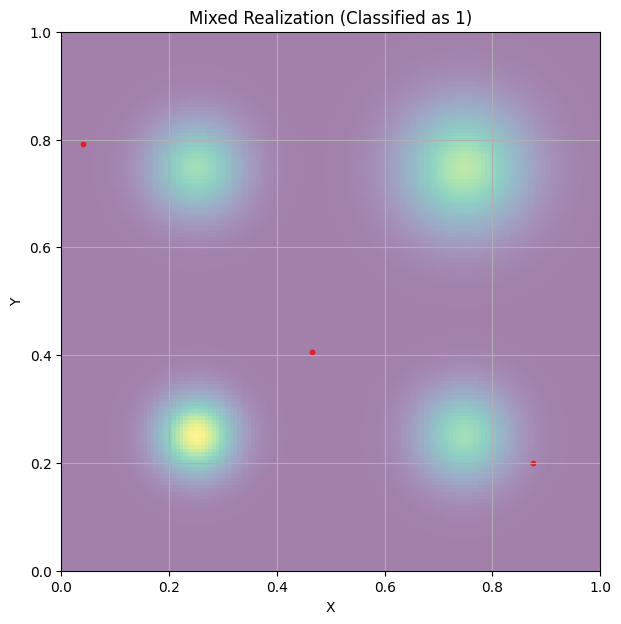

In [ ]:
# --- Bayes classifier ---
p1, p2, p3 = 1/3, 1/3, 1/3

grid_cell_area = (1/grid_size)**2

mu1_S = np.sum(lambda_1(X, Y)) * grid_cell_area
mu2_S = np.sum(lambda_2(X, Y)) * grid_cell_area
mu3_S = np.sum(lambda_3(X, Y)) * grid_cell_area

print(f"\nApproximate total intensities (mu_j(S)):")
print(f"mu_1(S) = {mu1_S:.2f}")
print(f"mu_2(S) = {mu2_S:.2f}")
print(f"mu_3(S) = {mu3_S:.2f}")


def bayes_classification(x_points, lambda_funcs, mu_S_values, priors):
    M = len(lambda_funcs)
    log_posteriors = np.zeros(M) # Changed from log_likelihoods to log_posteriors for clarity

    for j in range(M):
        current_lambda = lambda_funcs[j]
        current_mu_S = mu_S_values[j]

        log_prob_x_given_j = (S_area - current_mu_S) # nu(S) is S_area (1.0)

        # Sum of log(lambda_j(xi)) over the points in x
        for point in x_points:
            # Handle cases where lambda(point) might be zero or near-zero, leading to log(0)
            intensity_at_point = current_lambda(point[0], point[1])
            if intensity_at_point > 1e-10: # Add a small epsilon to avoid log(0)
                log_prob_x_given_j += np.log(intensity_at_point)
            else:
                # If intensity is effectively zero, this likelihood should be very low.
                # Assign a very small negative number to log_prob_x_given_j.
                # This makes the product term very small.
                log_prob_x_given_j = -np.inf
                break # No need to continue summing, as one zero makes the product zero

        if np.isinf(log_prob_x_given_j) and log_prob_x_given_j < 0:
            log_posterior = -np.inf # If likelihood is zero, posterior is zero
        else:
            log_posterior = log_prob_x_given_j + np.log(priors[j])

        log_posteriors[j] = log_posterior

    classified_class = np.argmax(log_posteriors)
    return classified_class, log_posteriors


lambda_funcs_list = [lambda_1, lambda_2, lambda_3]
mu_S_values_list = [mu1_S, mu2_S, mu3_S]
priors_list = [p1, p2, p3]

classification_1, lp1 = bayes_classification(realization_1, lambda_funcs_list, mu_S_values_list, priors_list)
classification_2, lp2 = bayes_classification(realization_2, lambda_funcs_list, mu_S_values_list, priors_list)
classification_3, lp3 = bayes_classification(realization_3, lambda_funcs_list, mu_S_values_list, priors_list)


print(f"\nClassification of Realization 1 (true class 0): Class {classification_1}, Log Posteriors: {lp1}")
print(f"Classification of Realization 2 (true class 1): Class {classification_2}, Log Posteriors: {lp2}")
print(f"Classification of Realization 3 (true class 2): Class {classification_3}, Log Posteriors: {lp3}")

# Test a "mixed" realization or a realization that might be ambiguous

# Ensure realization_1 and realization_2 are at least 2D for consistent slicing
if realization_1.ndim == 1 and realization_1.size == 0:
    realization_1_2d = np.empty((0, 2)) # Create an empty 2D array
else:
    realization_1_2d = realization_1

if realization_2.ndim == 1 and realization_2.size == 0:
    realization_2_2d = np.empty((0, 2)) # Create an empty 2D array
else:
    realization_2_2d = realization_2


# Take slices from the 2D versions
slice_1 = realization_1_2d[:max(1, len(realization_1_2d)//2)]
slice_2 = realization_2_2d[:max(1, len(realization_2_2d)//2)]


mixed_realization = np.concatenate((slice_1, slice_2), axis=0)

if len(mixed_realization) > 0:
    classification_mixed, lp_mixed = bayes_classification(mixed_realization, lambda_funcs_list, mu_S_values_list, priors_list)
    print(f"\nClassification of a Mixed Realization: Class {classification_mixed}, Log Posteriors: {lp_mixed}")

    plt.figure(figsize=(7, 7))
    # Plot sum of intensities for context
    plt.imshow(lambda_1(X, Y) + lambda_2(X,Y) + lambda_3(X,Y), origin='lower', extent=[0, 1, 0, 1], cmap='viridis', alpha=0.5)
    plt.scatter(mixed_realization[:, 0], mixed_realization[:, 1], color='red', s=10, alpha=0.7)
    plt.title(f'Mixed Realization (Classified as {classification_mixed})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()
else:
    print("\nNo points in mixed realization to classify.")

In [ ]:
a=(1,0)
a[0]

1

In [ ]:
l

In [ ]:
import pandas as pd

In [ ]:
np.concatenate((realization_1[:, 0], realization_1[:, 1]))

array([0.10299446, 0.57494456])

In [ ]:
l=[]
l.extend(realization_1[:, 1])
l

[np.float64(0.5749445615827309)]

In [ ]:
realization_1[:, 0]+realization_1[:, 1]

array([0.67793902])

In [ ]:
data = pd.DataFrame({'X': realization_1[:, 0], 'Y': realization_1[:, 1], 'Class': [0] * len(realization_1)})
data

,X,Y,Class
0,0.102994,0.574945,0


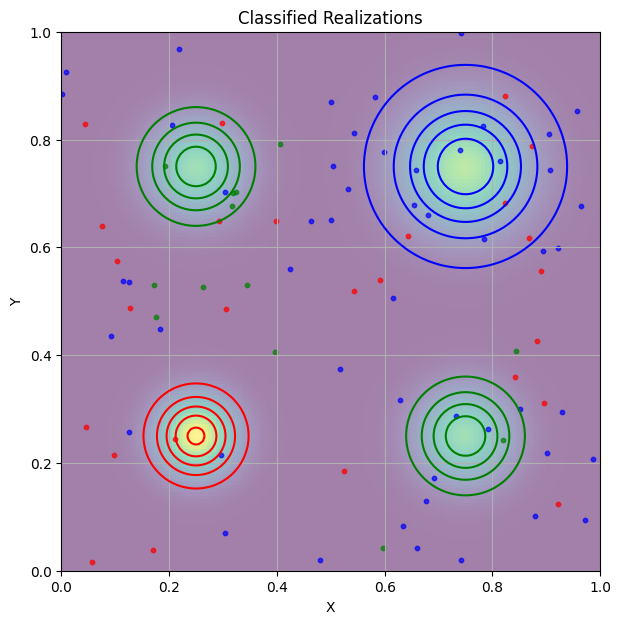

In [ ]:
colors = ['red', 'blue', 'green']
list_x=[]
list_y=[]
list_class=[]

plt.figure(figsize=(7, 7))
# Plot sum of intensities for context
plt.imshow(lambda_1(X, Y) + lambda_2(X,Y) + lambda_3(X,Y), origin='lower', extent=[0, 1, 0, 1], cmap='viridis', alpha=0.5)
plt.contour(X, Y, lambda_1(X, Y), levels=5, colors='red', )
plt.contour(X, Y, lambda_2(X, Y), levels=5, colors='blue', )
plt.contour(X, Y, lambda_3(X, Y), levels=5, colors='green', )

# Plot each point with the color corresponding to its classified class

for rea in realizations_1:
  if len(rea) > 0:  # Check if the realization is not empty
    list_x.extend(rea[:, 0])
    list_y.extend(rea[:, 1])
    list_class.extend([0] * len(rea))
    plt.scatter(rea[:, 0], rea[:, 1], color='red', s=10, alpha=0.7)

for rea in realizations_2:
  if len(rea) > 0:  # Check if the realization is not empty
    list_x.extend(rea[:, 0])
    list_y.extend(rea[:, 1])
    list_class.extend([1] * len(rea))
    plt.scatter(rea[:, 0], rea[:, 1], color='blue', s=10, alpha=0.7)

for rea in realizations_3:
  if len(rea) > 0:  # Check if the realization is not empty
    list_x.extend(rea[:, 0])
    list_y.extend(rea[:, 1])
    list_class.extend([2] * len(rea))
    plt.scatter(rea[:, 0], rea[:, 1], color='green', s=10, alpha=0.7)


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Classified Realizations')
plt.grid(True)
plt.show()


Approximate total intensities (mu_j(S)):
mu_1(S) = 0.65
mu_2(S) = 1.32
mu_3(S) = 0.51


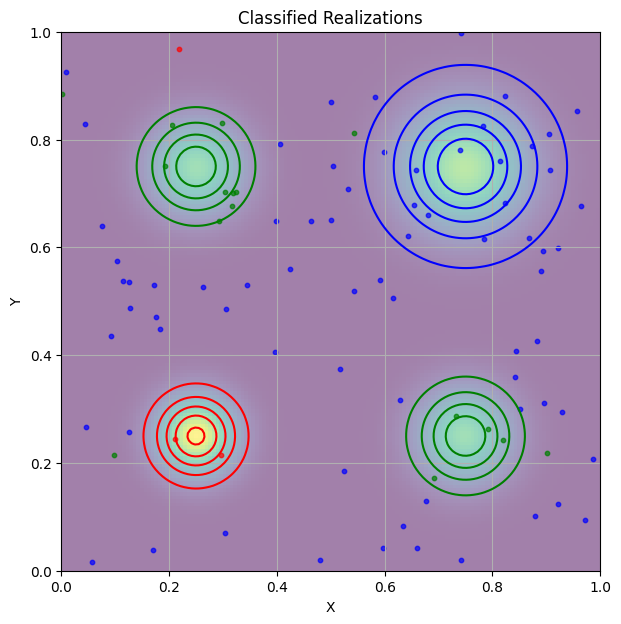

In [ ]:
# --- Bayes classifier ---
p1, p2, p3 = 1/3, 1/3, 1/3

grid_cell_area = (1/grid_size)**2

mu1_S = np.sum(lambda_1(X, Y)) * grid_cell_area
mu2_S = np.sum(lambda_2(X, Y)) * grid_cell_area
mu3_S = np.sum(lambda_3(X, Y)) * grid_cell_area

print(f"\nApproximate total intensities (mu_j(S)):")
print(f"mu_1(S) = {mu1_S:.2f}")
print(f"mu_2(S) = {mu2_S:.2f}")
print(f"mu_3(S) = {mu3_S:.2f}")


def bayes_classification(x_points, lambda_funcs, mu_S_values, priors):
    M = len(lambda_funcs)
    log_posteriors = np.zeros(M) # Changed from log_likelihoods to log_posteriors for clarity

    for j in range(M):
        current_lambda = lambda_funcs[j]
        current_mu_S = mu_S_values[j]

        log_prob_x_given_j = (S_area - current_mu_S) # nu(S) is S_area (1.0)

        # Sum of log(lambda_j(xi)) over the points in x
        for point in x_points:
            # Handle cases where lambda(point) might be zero or near-zero, leading to log(0)
            intensity_at_point = current_lambda(point[0], point[1])
            if intensity_at_point > 1e-10: # Add a small epsilon to avoid log(0)
                log_prob_x_given_j += np.log(intensity_at_point)
            else:
                # If intensity is effectively zero, this likelihood should be very low.
                # Assign a very small negative number to log_prob_x_given_j.
                # This makes the product term very small.
                log_prob_x_given_j = -np.inf
                break # No need to continue summing, as one zero makes the product zero

        if np.isinf(log_prob_x_given_j) and log_prob_x_given_j < 0:
            log_posterior = -np.inf # If likelihood is zero, posterior is zero
        else:
            log_posterior = log_prob_x_given_j + np.log(priors[j])

        log_posteriors[j] = log_posterior

    classified_class = np.argmax(log_posteriors)
    return classified_class, log_posteriors


lambda_funcs_list = [lambda_1, lambda_2, lambda_3]
mu_S_values_list = [mu1_S, mu2_S, mu3_S]
priors_list = [p1, p2, p3]

class_realizations_1 = [bayes_classification(r1, lambda_funcs_list, mu_S_values_list, priors_list) for r1 in realizations_1]
class_realizations_2 = [bayes_classification(r2, lambda_funcs_list, mu_S_values_list, priors_list) for r2 in realizations_2]
class_realizations_3 = [bayes_classification(r3, lambda_funcs_list, mu_S_values_list, priors_list) for r3 in realizations_3]

realizations = realizations_1 + realizations_2 + realizations_3
all_classifications = class_realizations_1 + class_realizations_2 + class_realizations_3

colors = ['red', 'blue', 'green']

plt.figure(figsize=(7, 7))
# Plot sum of intensities for context
plt.imshow(lambda_1(X, Y) + lambda_2(X,Y) + lambda_3(X,Y), origin='lower', extent=[0, 1, 0, 1], cmap='viridis', alpha=0.5)
plt.contour(X, Y, lambda_1(X, Y), levels=5, colors='red', )
plt.contour(X, Y, lambda_2(X, Y), levels=5, colors='blue', )
plt.contour(X, Y, lambda_3(X, Y), levels=5, colors='green', )

# Plot each point with the color corresponding to its classified class
for i, (classified_class, _) in enumerate(all_classifications):
    # Check if the realization is not empty before plotting
    if len(realizations[i]) > 0 :
        plt.scatter(realizations[i][:, 0], realizations[i][:, 1], color=colors[classified_class], s=10, alpha=0.7)


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Classified Realizations')
plt.grid(True)
plt.show()

In [ ]:
classes_=[classified_class for i, (classified_class, _) in enumerate(all_classifications)]

In [ ]:
len(classes_)

150

Text(0.5, 1.0, 'Confusion matrix ')

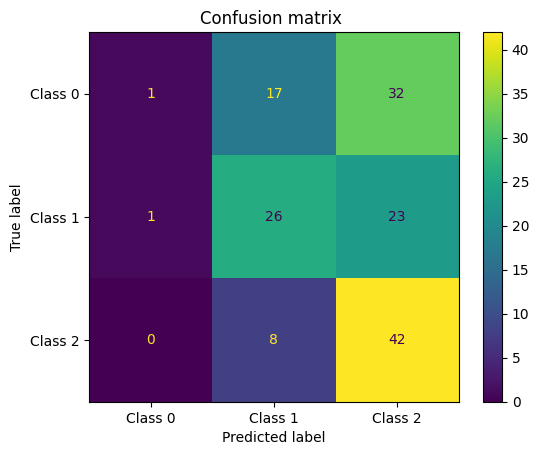

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

real_classes = [0] * len(realizations_1) + [1] * len(realizations_2) + [2] * len(realizations_3)
l = ['Class 0', 'Class 1', 'Class 2'] # Assuming these are the labels
cm = confusion_matrix(real_classes, classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=l, )
disp.plot()
plt.title("Confusion matrix ")

In [ ]:
data = pd.DataFrame({'X': list_x, 'Y': list_y, 'Class': list_class})
data

,X,Y,Class
0,0.643321,0.621518,0
1,0.398165,0.649659,0
2,0.127581,0.487017,0
3,0.045977,0.267556,0
4,0.169911,0.038534,0
...,...,...,...
86,0.171885,0.530910,2
87,0.318112,0.700059,2
88,0.843717,0.407335,2
89,0.396604,0.406178,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train = data[['X', 'Y']]
y_train = data['Class']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf.score(x_train, y_train)

1.0

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(x_train, y_train)

0.6923076923076923

In [ ]:
knn_classifications = knn.predict(x_train)

Text(0.5, 1.0, 'Confusion matrix KNN ')

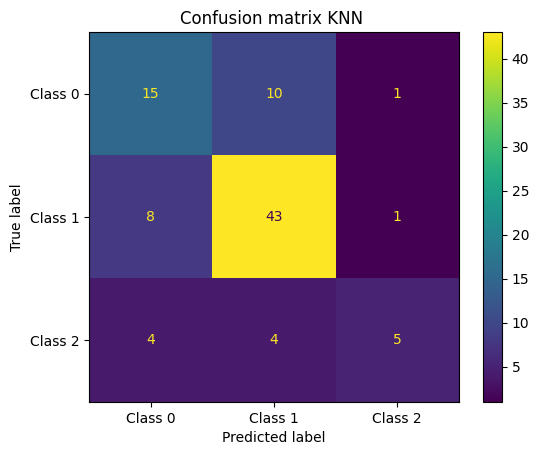

In [ ]:
l = ['Class 0', 'Class 1', 'Class 2'] # Assuming these are the labels
cm = confusion_matrix(y_train, knn_classifications)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=l, )
disp.plot()
plt.title("Confusion matrix KNN ")

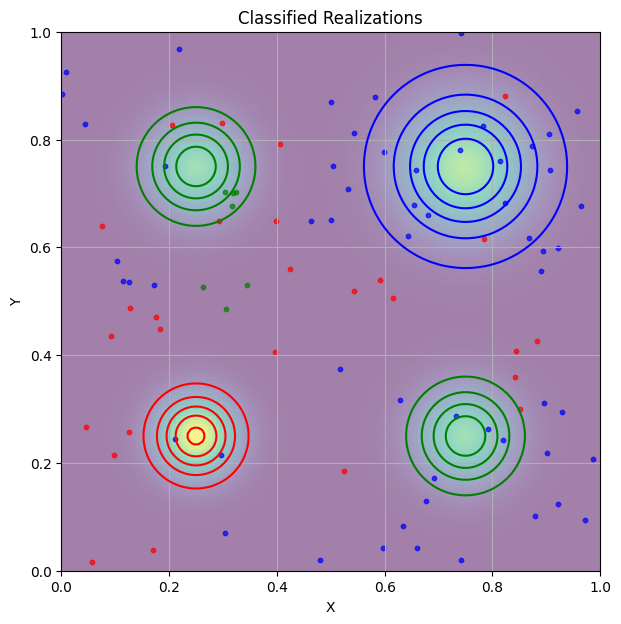

In [ ]:
plt.figure(figsize=(7, 7))
# Plot sum of intensities for context
plt.imshow(lambda_1(X, Y) + lambda_2(X,Y) + lambda_3(X,Y), origin='lower', extent=[0, 1, 0, 1], cmap='viridis', alpha=0.5)
plt.contour(X, Y, lambda_1(X, Y), levels=5, colors='red', )
plt.contour(X, Y, lambda_2(X, Y), levels=5, colors='blue', )
plt.contour(X, Y, lambda_3(X, Y), levels=5, colors='green', )

for X_point, Y_point, class_label in zip(x_train['X'], x_train['Y'], knn_classifications):
    plt.scatter(X_point, Y_point, color=colors[class_label], s=10, alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Classified Realizations')
plt.grid(True)